In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
import os
import requests
from bs4 import BeautifulSoup
import re
%load_ext dotenv
%dotenv
sns.set(style="darkgrid")

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [23]:
lyrics_df = pd.read_csv('taylor_swift_lyrics.csv', encoding= "ISO-8859-1")
lyrics_df['lyric_textblob'] = lyrics_df['lyric'].apply(lambda x: TextBlob(x))
lyrics_df['polarity'] = lyrics_df['lyric_textblob'].apply(lambda x: x.sentiment.polarity)
lyrics_df['subjectivity'] = lyrics_df['lyric_textblob'].apply(lambda x: x.sentiment.subjectivity)
lyrics_df.head()

,artist,album,track_title,track_n,lyric,line,year,lyric_textblob,polarity,subjectivity
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,"(H, e, , s, a, i, d, , t, h, e, , w, a, y, ...",0.0,0.1
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,"(P, u, t, , t, h, o, s, e, , G, e, o, r, g, ...",0.0,0.0
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"(I, , s, a, i, d, ,, , "", T, h, a, t, ', s, ...",0.0,0.0
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,"(J, u, s, t, , a, , b, o, y, , i, n, , a, ...",0.0,0.0
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,"(T, h, a, t, , h, a, d, , a, , t, e, n, d, ...",0.0,0.0


In [16]:
song_df = lyrics_df.groupby(['album','track_title'])['lyric'].apply(" ".join).reset_index()
song_df['song_textblob'] = song_df['lyric'].apply(lambda x: TextBlob(x))
song_df['polarity'] = song_df['song_textblob'].apply(lambda x: x.sentiment.polarity)
song_df['subjectivity'] = song_df['song_textblob'].apply(lambda x: x.sentiment.subjectivity)
song_df.head()

,album,track_title,lyric,song_textblob,polarity,subjectivity
0,1989,All You Had to Do Was Stay,People like you always want back The love they...,"(P, e, o, p, l, e, , l, i, k, e, , y, o, u, ...",0.201206,0.403947
1,1989,Bad Blood,"'Cause baby, now we've got bad blood You know ...","(', C, a, u, s, e, , b, a, b, y, ,, , n, o, ...",-0.234846,0.630275
2,1989,Blank Space,"Nice to meet you, where you been? I could show...","(N, i, c, e, , t, o, , m, e, e, t, , y, o, ...",-0.003736,0.615789
3,1989,Clean,The drought was the very worst When the flower...,"(T, h, e, , d, r, o, u, g, h, t, , w, a, s, ...",0.051141,0.600347
4,1989,How You Get The Girl,"Uh, uh, uh Uh, uh, uh Uh-uh, uh-uh Stand there...","(U, h, ,, , u, h, ,, , u, h, , U, h, ,, , ...",-0.078125,0.450000


In [22]:
display(song_df.sort_values('polarity').head())
display(song_df.sort_values('polarity', ascending = False).head())

,album,track_title,lyric,song_textblob,polarity,subjectivity
9,1989,Shake It Off,I stay out too late Got nothing in my brain Th...,"(I, , s, t, a, y, , o, u, t, , t, o, o, , ...",-0.482914,0.869336
1,1989,Bad Blood,"'Cause baby, now we've got bad blood You know ...","(', C, a, u, s, e, , b, a, b, y, ,, , n, o, ...",-0.234846,0.630275
72,Taylor Swift,Picture To Burn,"State the obvious, I didn't get my perfect fan...","(S, t, a, t, e, , t, h, e, , o, b, v, i, o, ...",-0.199145,0.606838
37,Red,I Knew You Were Trouble,"Once upon a time, a few mistakes ago I was in ...","(O, n, c, e, , u, p, o, n, , a, , t, i, m, ...",-0.196356,0.328283
23,Fearless,Tell Me Why,I took a chance I took a shot And you might th...,"(I, , t, o, o, k, , a, , c, h, a, n, c, e, ...",-0.190594,0.533363


,album,track_title,lyric,song_textblob,polarity,subjectivity
65,Taylor Swift,A Perfectly Good Heart,Why would you wanna break a perfectly good hea...,"(W, h, y, , w, o, u, l, d, , y, o, u, , w, ...",0.523529,0.525490
74,Taylor Swift,Stay Beautiful,"Cory's eyes are like a jungle He smiles, it's ...","(C, o, r, y, ', s, , e, y, e, s, , a, r, e, ...",0.437351,0.672917
12,1989,Welcome to New York,"Walking through a crowd, the village is aglow ...","(W, a, l, k, i, n, g, , t, h, r, o, u, g, h, ...",0.426636,0.658263
21,Fearless,Hey Stephen,"Hey Stephen, I know looks can be deceiving But...","(H, e, y, , S, t, e, p, h, e, n, ,, , I, , ...",0.353889,0.717778
33,Red,Everything Has Changed (Ft. Ed Sheeran),All I knew this morning when I woke Is I know ...,"(A, l, l, , I, , k, n, e, w, , t, h, i, s, ...",0.339293,0.442964


In [28]:
# Why is Shake It Off most negative song? 
display(lyrics_df[lyrics_df['track_title'] == 'Shake It Off'].sort_values('polarity').head())
display(lyrics_df[lyrics_df['track_title'] == 'Shake It Off'].sort_values('polarity', ascending = False).head())

,artist,album,track_title,track_n,lyric,line,year,lyric_textblob,polarity,subjectivity
3268,Taylor Swift,1989,Shake It Off,6,"And the haters gonna hate, hate, hate, hate, hate",34,2014,"(A, n, d, , t, h, e, , h, a, t, e, r, s, , ...",-0.80000,0.900000
3248,Taylor Swift,1989,Shake It Off,6,"And the haters gonna hate, hate, hate, hate, hate",14,2014,"(A, n, d, , t, h, e, , h, a, t, e, r, s, , ...",-0.80000,0.900000
3288,Taylor Swift,1989,Shake It Off,6,"And the haters gonna hate, hate, hate, hate, h...",54,2014,"(A, n, d, , t, h, e, , h, a, t, e, r, s, , ...",-0.80000,0.900000
3281,Taylor Swift,1989,Shake It Off,6,"And dirty, dirty cheats of the world you could...",47,2014,"(A, n, d, , d, i, r, t, y, ,, , d, i, r, t, ...",-0.51746,0.686508
3252,Taylor Swift,1989,Shake It Off,6,"And the fakers gonna fake, fake, fake, fake, fake",18,2014,"(A, n, d, , t, h, e, , f, a, k, e, r, s, , ...",-0.50000,1.000000


,artist,album,track_title,track_n,lyric,line,year,lyric_textblob,polarity,subjectivity
3284,Taylor Swift,1989,Shake It Off,6,And to the fella over there with the hella goo...,50,2014,"(A, n, d, , t, o, , t, h, e, , f, e, l, l, ...",0.700000,0.600000
3259,Taylor Swift,1989,Shake It Off,6,I'm dancing on my own (dancing on my own),25,2014,"(I, ', m, , d, a, n, c, i, n, g, , o, n, , ...",0.600000,1.000000
3239,Taylor Swift,1989,Shake It Off,6,I go on too many dates,5,2014,"(I, , g, o, , o, n, , t, o, o, , m, a, n, ...",0.500000,0.500000
3282,Taylor Swift,1989,Shake It Off,6,My ex-man brought his new girlfriend,48,2014,"(M, y, , e, x, -, m, a, n, , b, r, o, u, g, ...",0.136364,0.454545
3271,Taylor Swift,1989,Shake It Off,6,"Heartbreakers gonna break, break, break, break...",37,2014,"(H, e, a, r, t, b, r, e, a, k, e, r, s, , g, ...",0.000000,0.000000


In [45]:
song_df.groupby(['album']).mean()

,polarity,subjectivity
album,,
1989,0.054124,0.512417
Fearless,0.095117,0.520810
Red,0.100281,0.481302
Speak Now,0.103686,0.467733
Taylor Swift,0.164292,0.534923
reputation,0.069012,0.514501


In [101]:
song_df['song_length'] = song_df['lyric'].apply(lambda x: len(x.split()))
song_df['song_length_unique'] = song_df['lyric'].apply(lambda x: len(set(x.split())))
song_df['uniqueness'] = song_df['song_length_unique'] / song_df['song_length']
song_df.sort_values('uniqueness').head()
display(song_df[['album','track_title','uniqueness']].sort_values('uniqueness').head())
display(song_df[['album','track_title','uniqueness']].sort_values('uniqueness', ascending = False).head())

,album,track_title,uniqueness
8,1989,Out of the Woods,0.197853
6,1989,I Wish You Would,0.223801
90,reputation,Look What You Made Me Do,0.235189
0,1989,All You Had to Do Was Stay,0.242826
9,1989,Shake It Off,0.248739


,album,track_title,uniqueness
39,Red,Sad Beautiful Tragic,0.546448
16,Fearless,Breathe (Ft. Colbie Caillat),0.538462
17,Fearless,Change,0.524164
24,Fearless,The Best Day,0.502841
41,Red,State of Grace,0.493506


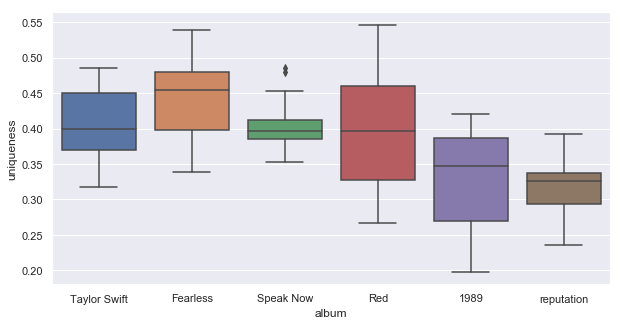

In [151]:
# album_year = {'Taylor Swift': 2006, 'Fearless': 2008, 'Speak Now': 2010, 'Red': 2012, '1989': 2014, 'reputation': 2017}
color_dict = {'Taylor Swift': 'deepskyblue', 'Fearless': 'gold', 'Speak Now': 'mediumorchid', 'Red': 'red', '1989': 'lightskyblue', 'reputation': 'black'}
# album_year_df = pd.DataFrame(pd.DataFrame(album_year,index=[0]).unstack()).droplevel(level=1)
# album_year_df.columns = ['year']
# album_year_df

plt.figure(figsize=(10,5))
sns.boxplot(x = 'album', y= 'uniqueness', data = song_df, order = ['Taylor Swift','Fearless','Speak Now','Red','1989','reputation']);
    
    
    
    
    

In [22]:
# Set parameters to call API
genius_token=os.getenv("GENIUS_TOKEN")
base_url = "http://api.genius.com"
value = 'Bearer ' + genius_token
headers= {'Authorization': value}

In [28]:
search_url = base_url + "/search"
artist_name = "Taylor Swift"
params = {'q': artist_name}
response = requests.get(search_url, params = params, headers=headers)
response_data = response.json()
response_data

{'meta': {'status': 200},
 'response': {'hits': [{'highlights': [],
    'index': 'song',
    'type': 'song',
    'result': {'annotation_count': 13,
     'api_path': '/songs/3210592',
     'full_title': 'Look What You Made Me Do by\xa0Taylor\xa0Swift',
     'header_image_thumbnail_url': 'https://images.genius.com/4303d8c0fc0321cc9c7e591ac30722b4.300x300x1.jpg',
     'header_image_url': 'https://images.genius.com/4303d8c0fc0321cc9c7e591ac30722b4.699x699x1.jpg',
     'id': 3210592,
     'lyrics_owner_id': 2171344,
     'lyrics_state': 'complete',
     'path': '/Taylor-swift-look-what-you-made-me-do-lyrics',
     'pyongs_count': 182,
     'song_art_image_thumbnail_url': 'https://images.genius.com/bcd1ae9927c14b71b487d00cb4fa1b8c.300x300x1.png',
     'stats': {'hot': False,
      'unreviewed_annotations': 0,
      'pageviews': 1444567},
     'title': 'Look What You Made Me Do',
     'title_with_featured': 'Look What You Made Me Do',
     'url': 'https://genius.com/Taylor-swift-look-what-you

In [26]:
taylor_swift_id = response_data['response']['hits'][0]['result']['primary_artist']['id']
taylor_swift_id

1177

In [50]:
search_query = 'taylor swift me'
song_title = "ME!"
params = {'q': search_query}
response = requests.get(search_url, params = params, headers=headers)
response_data = response.json()
response_data

{'meta': {'status': 200},
 'response': {'hits': [{'highlights': [],
    'index': 'song',
    'type': 'song',
    'result': {'annotation_count': 12,
     'api_path': '/songs/4472545',
     'full_title': 'ME! by\xa0Taylor\xa0Swift (Ft.\xa0Brendon\xa0Urie)',
     'header_image_thumbnail_url': 'https://images.genius.com/91801b3ad216d08b77b40447cb4d1b9f.300x168x1.jpg',
     'header_image_url': 'https://images.genius.com/91801b3ad216d08b77b40447cb4d1b9f.640x359x1.jpg',
     'id': 4472545,
     'lyrics_owner_id': 93685,
     'lyrics_state': 'complete',
     'path': '/Taylor-swift-me-lyrics',
     'pyongs_count': 72,
     'song_art_image_thumbnail_url': 'https://images.genius.com/6a69d583d0d2f5cbeecedbcc60b9f382.300x300x1.jpg',
     'stats': {'hot': False,
      'unreviewed_annotations': 0,
      'concurrents': 32,
      'pageviews': 878897},
     'title': 'ME!',
     'title_with_featured': 'ME! (Ft.\xa0Brendon\xa0Urie)',
     'url': 'https://genius.com/Taylor-swift-me-lyrics',
     'primary_a

In [88]:
# response_data['response']['hits']
# response_data['response']['hits'][0]['result']['title']
for i in response_data['response']['hits']:
    if i['result']['title'] == song_title:
        url = i['result']['url']
page = requests.get(url)
html = BeautifulSoup(page.text, "html.parser") # Extract the page's HTML as a string
lyrics = html.find("div", class_="lyrics").get_text()
# print(lyrics)
regex = re.compile("\[.*?\]")
result = re.sub(regex, "",lyrics)
result = result.replace("(","")
result = result.replace(")","")
me_words = result.split()
me_unique = set(me_words)
print(len(me_unique))
print(len(me_words))
print(len(me_unique)/len(me_words))


# for i in result:
#     print(i)
#     lyrics.replace(i,"")
#     print(lyrics)
# print(lyrics)

    


138
471
0.2929936305732484


In [35]:
response_data['response']['hits']

[{'highlights': [],
  'index': 'song',
  'type': 'song',
  'result': {'annotation_count': 12,
   'api_path': '/songs/4472545',
   'full_title': 'ME! by\xa0Taylor\xa0Swift (Ft.\xa0Brendon\xa0Urie)',
   'header_image_thumbnail_url': 'https://images.genius.com/91801b3ad216d08b77b40447cb4d1b9f.300x168x1.jpg',
   'header_image_url': 'https://images.genius.com/91801b3ad216d08b77b40447cb4d1b9f.640x359x1.jpg',
   'id': 4472545,
   'lyrics_owner_id': 93685,
   'lyrics_state': 'complete',
   'path': '/Taylor-swift-me-lyrics',
   'pyongs_count': 72,
   'song_art_image_thumbnail_url': 'https://images.genius.com/6a69d583d0d2f5cbeecedbcc60b9f382.300x300x1.jpg',
   'stats': {'hot': False,
    'unreviewed_annotations': 0,
    'concurrents': 35,
    'pageviews': 878861},
   'title': 'ME!',
   'title_with_featured': 'ME! (Ft.\xa0Brendon\xa0Urie)',
   'url': 'https://genius.com/Taylor-swift-me-lyrics',
   'primary_artist': {'api_path': '/artists/1177',
    'header_image_url': 'https://images.genius.com/5